## Task 4 : Fraud Transaction Detection
by Luniva Shrestha

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Preprocessing

In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Scaling 

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [9]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148652,90107.0,2.128547,0.076863,-1.386885,0.325289,0.611520,-0.302593,0.059786,-0.305757,1.773389,...,-0.487792,-1.030814,0.287769,-0.013769,-0.182216,0.167551,-0.099504,-0.065571,-0.345313,0
268849,163410.0,2.099619,-0.023369,-1.369803,0.224338,0.339848,-0.669249,0.224435,-0.315935,0.446580,...,-0.319857,-0.739342,0.237677,-0.748881,-0.181017,0.244591,-0.063086,-0.065425,-0.329281,0
197784,132177.0,2.071716,-1.176000,-1.196195,-1.092389,-0.495480,0.029847,-0.801790,-0.007139,-0.229354,...,0.228813,0.550809,-0.024919,-1.131703,-0.067649,-0.133243,-0.019360,-0.061658,-0.031383,0
20448,31048.0,1.113545,0.072524,-0.057878,0.851785,0.071893,-0.226260,0.229842,0.012427,-0.167937,...,-0.443763,-1.570145,0.059097,-0.607211,0.275990,-0.822378,-0.012610,0.020895,-0.049095,0
274187,165892.0,-0.907447,0.124237,0.961216,-3.175978,-0.713443,-0.429556,-0.356525,0.465970,-2.578444,...,-0.162245,-0.118846,-0.433549,-0.433219,0.809407,-0.095515,0.134533,0.027117,-0.349231,0


In [10]:
df.drop('Time', axis=1, inplace=True)

In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
df.shape

(284807, 30)

In [13]:
df.duplicated().any()

True

In [14]:
df = df.drop_duplicates()

### EDA

In [15]:
df.shape

(275663, 30)

In [16]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

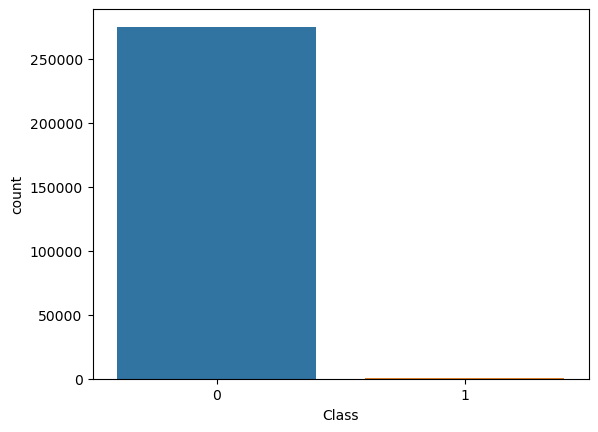

In [17]:
sns.countplot(data = df, x='Class')

<Axes: title={'center': 'Correlation with Class '}>

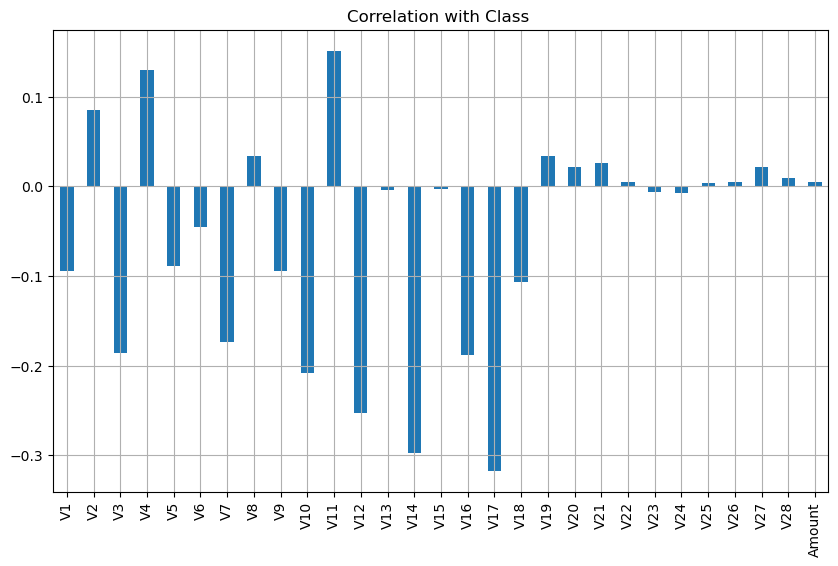

In [18]:
df.drop('Class',axis=1).corrwith(df.Class).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with Class ")

### Splitting target and feature variables

In [19]:
X = df.drop('Class', axis=1)

In [20]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [21]:
y = df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Handling imbalanced data

### Oversampling using SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [24]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

### Model building

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
log = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [29]:
clfs = {
    'LOG' : log,
    'DT' : dtc,
    'RF' : rfc
}

In [30]:
def model_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    return accuracy,precision,recall,f1

In [31]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for i,clf in clfs.items():
    current_accuracy,current_precision,current_recall,current_f1 = model_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",i)
    print("Accuracy : ",current_accuracy)
    print("Precision : ",current_precision)
    print("Recall : ",current_recall)
    print("F1 : ",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  LOG
Accuracy :  0.9457102365638286
Precision :  0.9728228373035008
Recall :  0.9169681653727978
F1 :  0.9440700808625337
For  DT
Accuracy :  0.9982375813074603
Precision :  0.9974947807933194
Recall :  0.9989818737159791
F1 :  0.9982377734176295
For  RF
Accuracy :  0.999918238308078
Precision :  0.9998363993310551
Recall :  1.0
F1 :  0.9999181929736854


In [32]:
performance_scores = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall':recall_scores, 'F1':f1_scores}).sort_values('Precision',ascending=False)
performance_scores

,Algorithm,Accuracy,Precision,Recall,F1
2,RF,0.999918,0.999836,1.000000,0.999918
1,DT,0.998238,0.997495,0.998982,0.998238
0,LOG,0.945710,0.972823,0.916968,0.944070


After oversampling Random Forest Classifier gives best result.

### Saving the model

In [33]:
rf = RandomForestClassifier()
rf.fit(X_res,y_res)

RandomForestClassifier()

In [34]:
import joblib

In [35]:
joblib.dump(rf,'fraud_detection_model')

['fraud_detection_model']

### Load and run the model

In [36]:
model = joblib.load('fraud_detection_model')

In [37]:
data = [-1.33,-0.07,2,1.32,0.33,0.55,0.23,0.09,0.35,0.09,-0.55,-0.61,-0.99,-0.319,1.46,-0.47,0.20,0.11,0.45,0.25,-0.01,0.27,-0.1,0.06,0.12,-0.14,0.15,-0.02,1]

In [38]:
res = model.predict([data])
if res == 1:
    print("Fraudulent Transaction")
else:
    print("Normal Transaction")

Normal Transaction
